In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.landscapes import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#

# Model parameters

## Traits

In [4]:
num_resources = 10

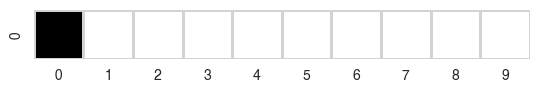

In [5]:
traits_init = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
viz.matrix_plot(traits_init, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [6]:
N_init = np.ones(traits_init.shape[0])
N_init

array([1.])

## Costs

In [7]:
cost_baseline = 0.1

In [8]:
cost_trait = 0.5

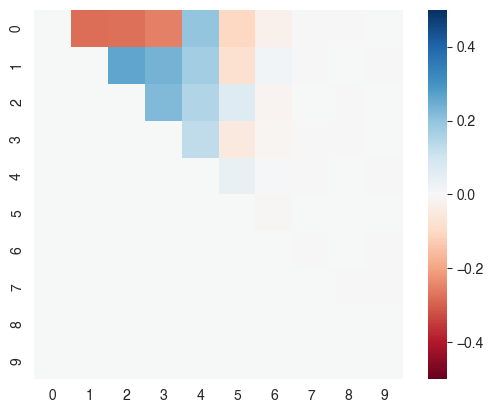

In [9]:
J_NSTAR = 8
J_SEED  = 2
#----------
J = utils.random_matrix((num_resources, num_resources), 'tikhonov_sigmoid_ordered', args={'J_0': 0.3, 'n_star': J_NSTAR, 'delta': 3}, triangular=True, diagonal=0, shuffle=False, order_power=0, seed=J_SEED)
viz.matrix_plot(J, vmin=-0.5, vmax=0.5)

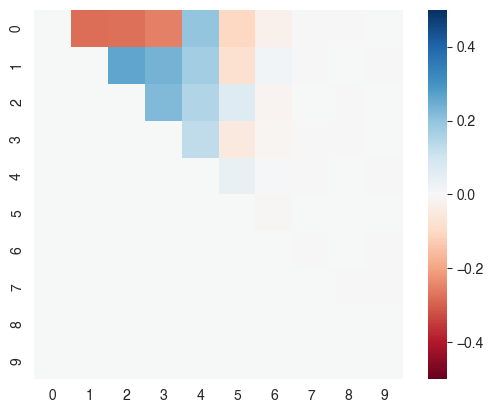

In [36]:
J_NSTAR = 8
J_SEED  = 2
#----------
J = utils.random_matrix((num_resources, num_resources), 'tikhonov_sigmoid_ordered', args={'J_0': 0.3, 'n_star': J_NSTAR, 'delta': 3}, triangular=True, diagonal=0, shuffle=False, order_power=0, seed=J_SEED)
viz.matrix_plot(J, vmin=-0.5, vmax=0.5)

In [ ]:
_rng = np.random.default_rng(1)

order_power = 5

# vals = J[J!=0]
vals = np.array(range(10))*3.14
num_vals = len(vals)

print(vals)

shuffled_vals = []
while len(shuffled_vals) < num_vals:
    # print()
    # print("vals", vals)
    # # print(vals**order_power)
    if(len(vals) > 1):
        p = (vals**order_power)/(np.sum(vals**order_power))
#         print("p", p)
        sel_i = _rng.choice(range(len(vals)), p=p)
#         print("sel_i", sel_i)
        shuffled_vals.append(vals[sel_i])
#         print("shuffled_vals", shuffled_vals)
        vals = np.delete(vals, sel_i)
    else:
        sel_i = 0
#         print("sel_i", sel_i)
        shuffled_vals.append(vals[sel_i])
#         print("shuffled_vals", shuffled_vals)
        vals = np.delete(vals, sel_i)
    
    # break

print(shuffled_vals)

## Environment

In [ ]:
R_init = np.array([1, 1, 0, 1, 1, 0, 0, 0, 0])
viz.matrix_plot(R_init, vmin=0, vmax=1, cbar=False, linecolor='lightgray', linewidths=1)

In [ ]:
influx_rates = np.zeros(traits_init.shape[1])
influx_rates[R_init > 0] = 1
viz.matrix_plot(influx_rates, vmin=0, cbar=False, linecolor='lightgray', linewidths=1)

In [ ]:
decay_rates = 1

In [ ]:
carrying_capacity = 1e9

# Initialize model

In [ ]:
community = Community(traits=traits_init, 
                      consumption_rate=consumption_rates, carrying_capacity=carrying_capacity, 
                      cost_landscape=landscape, cost_baseline=cost_baseline, 
                      mutation_rate=mutation_rates, segregation_rate=segregation_rates, transfer_rate_donor=transfer_rates_donor, transfer_rate_recip=transfer_rates_recip,
                      segregant_overrides=segregant_overrides, transconjugant_overrides=transconjugant_overrides,
                      segregation_linkage=linkage, transfer_linkage=linkage,
                      influx_rate=influx_rates, decay_rate=decay_rates,
                      lineageIDs=lineageIDs, lineageID_traits=[6, 7, 8],
                      N_init=N_init, R_init=R_init, seed=2)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 10))
viz.attributes_plot(community.type_set, ax=ax)

In [ ]:
# viz.attributes_plot(community.mutant_set)

In [ ]:
# viz.attributes_plot(community.segregant_set)

In [ ]:
# viz.attributes_plot(community.transconjugant_set)

# Run model

In [ ]:
T_total = 1e6

In [ ]:
community.run(T=T_total)

# Results

In [ ]:
cmapA = viz.lightdark_cmap('crimson', cmin=0.1, cmax=0.95, reverse=True)
cmapB = viz.lightdark_cmap('royalblue', cmin=0.1, cmax=0.95, reverse=True)
xconj_cmaps = [viz.lightdark_cmap(sns.color_palette('gnuplot2', as_cmap=True)(np.arange(0.45, 1.0, 0.1)[n-1]), cmin=0.1, cmax=0.95, reverse=True) for n in range(1, 7)]
# display(cmapA)
# display(cmapB)
# for cmap in xconj_cmaps: display(cmap)

In [ ]:
type_colors, type_hatches = viz.type_styles_by_phylogeny(community.type_set, color_tags={'A': cmapA, 'B': cmapB, 't': {n+1: cmapT for n, cmapT in enumerate(xconj_cmaps)}}, hatch_tags={'s': '///', '0': '///'}, 
                                                         vmin=min(landscape.values()), vmax=max(landscape.values()) )

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
viz.abundance_plot(community, ax=ax, type_colors=type_colors, type_hatches=type_hatches, relative_abundance=False, stacked=True, baseline='sym', log_x_axis=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
viz.phylogeny_plot(community, ax=ax, type_colors=type_colors, annot_lineageIDs=True, annot_traits=False, annot_extinct=True, annot_fontsize=8, log_x_axis=True)
# print(community.type_set.phylogeny)

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# viz.resource_plot(community, ax=ax, stacked=True, relative=False, log_x_axis=True, log_y_axis=False)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 10))
viz.attributes_plot(community.extant_type_set, ax=ax, type_colors=np.array(type_colors)[community.get_extant_type_indices()], annot_alpha=0.5)

In [ ]:
community.N[community.extant_type_indices]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 10))
viz.attributes_plot(community.type_set, ax=ax, type_colors=type_colors, annot_alpha=0.5)